In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/QBIO 465 FP/Original'
classes = ['Benign', 'Early', 'Pre', 'Pro']

In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

classes = ['Benign', 'Early', 'Pre', 'Pro']
data_dir = dataset_path

image_paths = []
labels = []

for cls in classes:
    cls_folder = os.path.join(data_dir, cls)

    if cls == 'Benign':

        folder_to_load = os.path.join(cls_folder, 'augmented')
    else:
        folder_to_load = cls_folder

    for fname in os.listdir(folder_to_load):
        if fname.endswith(".jpg"):
            image_paths.append(os.path.join(folder_to_load, fname))
            labels.append(cls)


In [ ]:
img_size = (224, 224)

def load_images(paths, size):
    images = []
    for path in paths:
      img = Image.open(path).resize(size)
      images.append(np.array(img))
    return np.array(images)

X = load_images(image_paths, img_size)
X = X.astype('float32') / 255.0

le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2921, 224, 224, 3)
Test shape: (731, 224, 224, 3)


In [ ]:
from collections import Counter
print(Counter(labels))

Counter({'Early': 985, 'Pre': 963, 'Benign': 900, 'Pro': 804})


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    # callbacks=[early_stop]
)

model.save('/content/drive/MyDrive/Spring 2025/QBIO 465/QBIO 465 FP/basic_cnn_seq_model.h5')


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.3423 - loss: 1.8468 - val_accuracy: 0.7031 - val_loss: 0.7301
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7138 - loss: 0.6661 - val_accuracy: 0.7679 - val_loss: 0.5172
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8030 - loss: 0.4942 - val_accuracy: 0.6212 - val_loss: 1.0936
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8033 - loss: 0.4709 - val_accuracy: 0.7986 - val_loss: 0.5444
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8788 - loss: 0.3301 - val_accuracy: 0.8430 - val_loss: 0.4475
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8849 - loss: 0.2985 - val_accuracy: 0.7031 - val_loss: 0.9152
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9007 - loss: 0.2494 - val_accuracy: 0.8567 - val_loss: 0.5525
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9249 - loss: 0.1934 - val_accuracy: 0.8771 - 

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8951 - loss: 0.4908
Test Accuracy: 0.9124


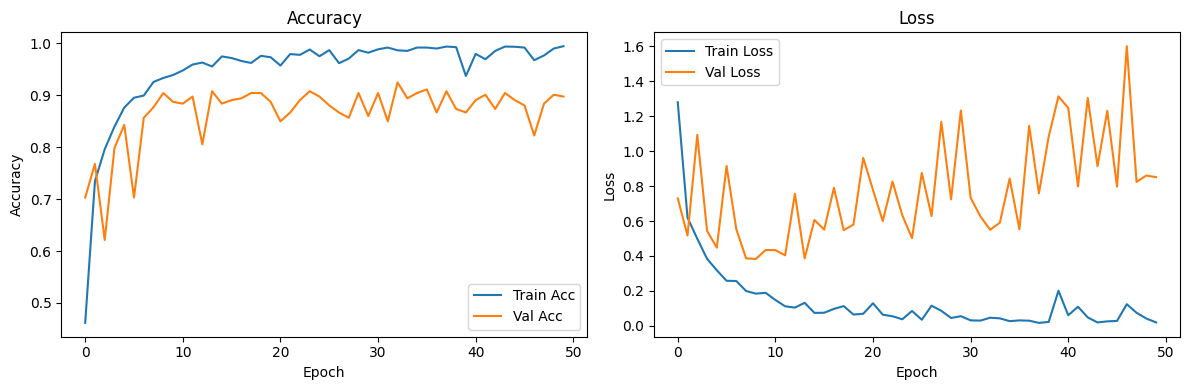

In [ ]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('basic_cnn_training_curve.png', dpi=300)
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
              precision    recall  f1-score   support

      Benign       0.90      0.83      0.86       180
       Early       0.84      0.86      0.85       197
         Pre       0.93      0.97      0.95       193
         Pro       1.00      1.00      1.00       161

    accuracy                           0.91       731
   macro avg       0.92      0.91      0.92       731
weighted avg       0.91      0.91      0.91       731



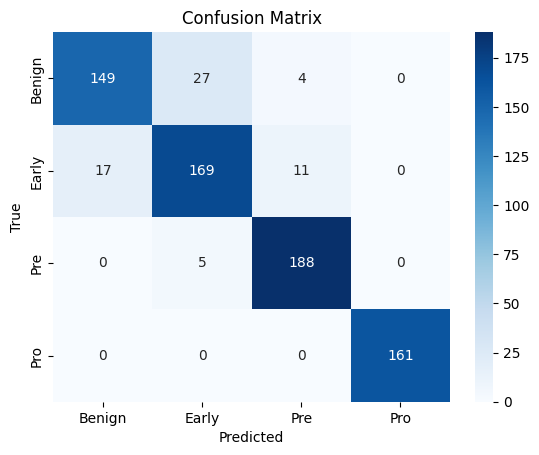

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_labels, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('basic_cnn_confusion_matrix.png', dpi=300)
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


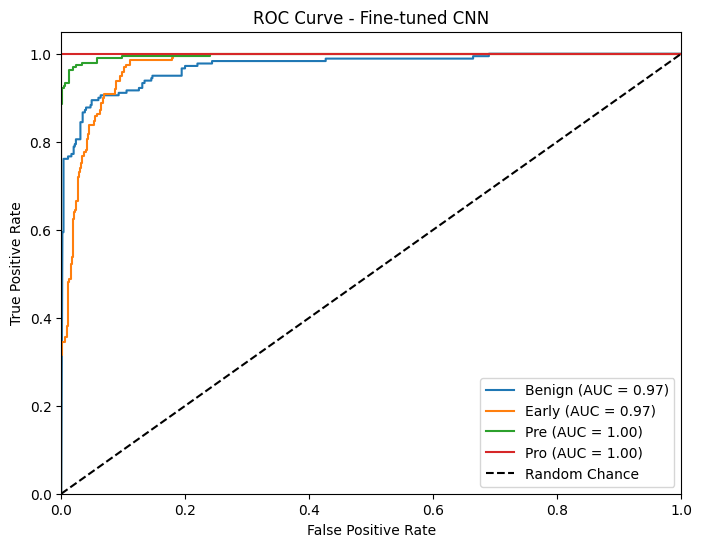

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(X_test)

y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))

for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Fine-tuned CNN')
plt.legend(loc='lower right')

plt.savefig('fine_tuned_cnn_roc_curve.png', dpi=300)
plt.show()